In [2]:
import pandas as pd
df = pd.read_csv("./data/wine_data.csv")

df.columns

features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline']
X = df[features]
y = df['class']

In [3]:
#train_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#stratify

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [4]:
#고유벡터, 고윳값으로 분해
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_std)

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_std.shape)
print(X_train_pca.shape)   

(133, 13)
(133, 2)


In [5]:
print(pca.singular_values_) #제일 높은거 n개 고름
#여기서 n개는 PCA 모델 세울 때 넣은 components 개수
#고윳값
print(pca.components_) #고유벡터 확인

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[25.3887705  18.00040359]
[[ 0.14285263 -0.24443441 -0.01392104 -0.24517361  0.1315099   0.38923734
   0.42471766 -0.30128613  0.30523465 -0.10462106  0.30267149  0.37266737
   0.29150867]
 [-0.50194071 -0.23015832 -0.31022311  0.03872248 -0.23858952 -0.09688729
  -0.01451474 -0.03693926 -0.0584635  -0.54240798  0.28168064  0.16944035
  -0.35182263]]
[4.88325506 2.45465553]
[0.37281068 0.18739996]


In [6]:
pca_columns = ['pca_comp1','pca_comp2']
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
y_train_1 = y_train.reset_index(drop=True)

X_train_pca_df['target'] = y_train_1
X_train_pca_df.head(10)

,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
3,-2.133376,-0.945897,2
4,2.236803,-2.269839,0
5,-2.287471,-0.199359,2
6,-2.972450,-0.296523,2
7,2.618098,-0.776070,0
8,-1.047055,-3.490933,2
9,2.609816,0.073457,0


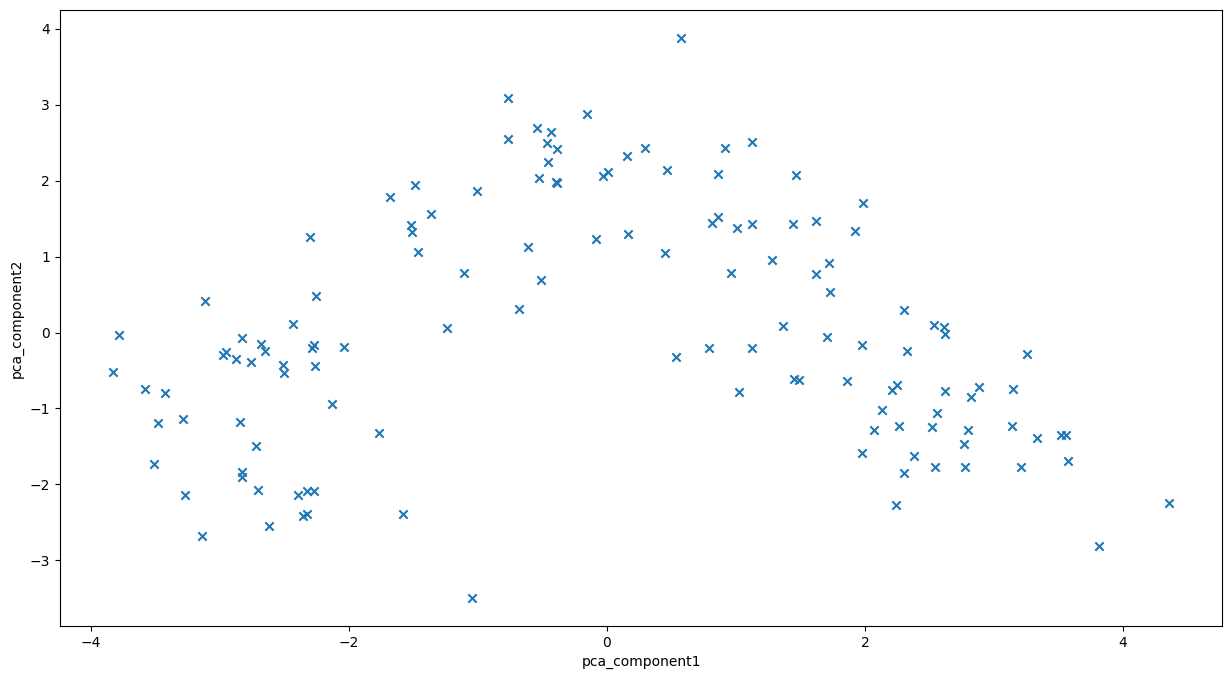

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.scatter(X_train_pca_df['pca_comp1'],
            X_train_pca_df['pca_comp2'],
            marker='x')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')

plt.show()